<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.282229,51.227421,-383.344390,-282.834740,-14.223462,-268.611278
1,0.0,1.0,58.745595,91.747301,-135.168558,25.324339,669.622587,-644.298248
2,0.0,2.0,64.204281,21.202383,-133.494168,-38.087505,-393.272051,355.184546
3,0.0,3.0,92.286992,73.399008,251.501453,427.187452,497.409709,-70.222256
4,0.0,4.0,42.459631,93.820753,717.952620,864.233005,648.533437,215.699567
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.911510,58.257274,-1640.259568,-1493.090783,375.373898,-1868.464682
19996,999.0,16.0,70.149228,40.743256,-295.483298,-174.590814,212.299681,-386.890495
19997,999.0,17.0,96.836941,53.438658,736.098006,896.373605,503.076552,393.297053
19998,999.0,18.0,51.262259,67.071009,-1315.452376,-1187.119108,185.394415,-1372.513523


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.282229,51.227421,-383.344390,-282.834740,-14.223462,-268.611278
1,0.0,1.0,58.745595,91.747301,-135.168558,25.324339,669.622587,-644.298248
2,0.0,2.0,64.204281,21.202383,-133.494168,-38.087505,-393.272051,355.184546
3,0.0,3.0,92.286992,73.399008,251.501453,427.187452,497.409709,-70.222256
4,0.0,4.0,42.459631,93.820753,717.952620,864.233005,648.533437,215.699567
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.911510,58.257274,-1640.259568,-1493.090783,375.373898,-1868.464682
19996,999.0,16.0,70.149228,40.743256,-295.483298,-174.590814,212.299681,-386.890495
19997,999.0,17.0,96.836941,53.438658,736.098006,896.373605,503.076552,393.297053
19998,999.0,18.0,51.262259,67.071009,-1315.452376,-1187.119108,185.394415,-1372.513523


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    39.282229  51.227421  -383.344390  -282.834740  -14.223462   
      1.0    58.745595  91.747301  -135.168558    25.324339  669.622587   
      2.0    64.204281  21.202383  -133.494168   -38.087505 -393.272051   
      3.0    92.286992  73.399008   251.501453   427.187452  497.409709   
      4.0    42.459631  93.820753   717.952620   864.233005  648.533437   
...                ...        ...          ...          ...         ...   
999.0 15.0   78.911510  58.257274 -1640.259568 -1493.090783  375.373898   
      16.0   70.149228  40.743256  -295.483298  -174.590814  212.299681   
      17.0   96.836941  53.438658   736.098006   896.373605  503.076552   
      18.0   51.262259  67.071009 -1315.452376 -1187.119108  185.394415   
      19.0   85.511549  40.870740   274.214107   410.596396  343.307258   

                   e_hat  
rep   index               
0.0   0.0    -268.611278  
      1.0    -644.298248  
      2.0     355.184546  
      3.0     -70.222256  
      4.0     215.699567  
...                  ...  
999.0 15.0  -1868.464682  
      16.0   -386.890495  
      17.0    393.297053  
      18.0  -1372.513523  
      19.0     67.289138  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    39.282229  51.227421  -383.344390  -282.834740  -14.223462   
      1.0    58.745595  91.747301  -135.168558    25.324339  669.622587   
      2.0    64.204281  21.202383  -133.494168   -38.087505 -393.272051   
      3.0    92.286992  73.399008   251.501453   427.187452  497.409709   
      4.0    42.459631  93.820753   717.952620   864.233005  648.533437   
...                ...        ...          ...          ...         ...   
999.0 15.0   78.911510  58.257274 -1640.259568 -1493.090783  375.373898   
      16.0   70.149228  40.743256  -295.483298  -174.590814  212.299681   
      17.0   96.836941  53.438658   736.098006   896.373605  503.076552   
      18.0   51.262259  67.071009 -1315.452376 -1187.119108  185.394415   
      19.0   85.511549  40.870740   274.214107   410.596396  343.307258   

                   e_hat  
rep   index               
0.0   0.0    -268.611278  
      1.0    -644.298248  
      2.0     355.184546  
      3.0     -70.222256  
      4.0     215.699567  
...                  ...  
999.0 15.0  -1868.464682  
      16.0   -386.890495  
      17.0    393.297053  
      18.0  -1372.513523  
      19.0     67.289138  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.282229,51.227421,-383.344390,-282.834740,-14.223462,-268.611278
1,0.0,1.0,58.745595,91.747301,-135.168558,25.324339,669.622587,-644.298248
2,0.0,2.0,64.204281,21.202383,-133.494168,-38.087505,-393.272051,355.184546
3,0.0,3.0,92.286992,73.399008,251.501453,427.187452,497.409709,-70.222256
4,0.0,4.0,42.459631,93.820753,717.952620,864.233005,648.533437,215.699567
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.911510,58.257274,-1640.259568,-1493.090783,375.373898,-1868.464682
19996,999.0,16.0,70.149228,40.743256,-295.483298,-174.590814,212.299681,-386.890495
19997,999.0,17.0,96.836941,53.438658,736.098006,896.373605,503.076552,393.297053
19998,999.0,18.0,51.262259,67.071009,-1315.452376,-1187.119108,185.394415,-1372.513523


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    39.282229  51.227421  -383.344390  -282.834740  -14.223462   
      1.0    58.745595  91.747301  -135.168558    25.324339  669.622587   
      2.0    64.204281  21.202383  -133.494168   -38.087505 -393.272051   
      3.0    92.286992  73.399008   251.501453   427.187452  497.409709   
      4.0    42.459631  93.820753   717.952620   864.233005  648.533437   
...                ...        ...          ...          ...         ...   
999.0 15.0   78.911510  58.257274 -1640.259568 -1493.090783  375.373898   
      16.0   70.149228  40.743256  -295.483298  -174.590814  212.299681   
      17.0   96.836941  53.438658   736.098006   896.373605  503.076552   
      18.0   51.262259  67.071009 -1315.452376 -1187.119108  185.394415   
      19.0   85.511549  40.870740   274.214107   410.596396  343.307258   

                   e_hat  
rep   index               
0.0   0.0    -268.611278  
      1.0    -644.298248  
      2.0     355.184546  
      3.0     -70.222256  
      4.0     215.699567  
...                  ...  
999.0 15.0  -1868.464682  
      16.0   -386.890495  
      17.0    393.297053  
      18.0  -1372.513523  
      19.0     67.289138  

[20000 rows x 6 columns]

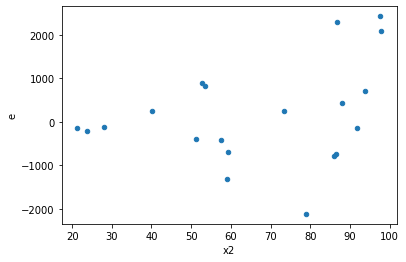

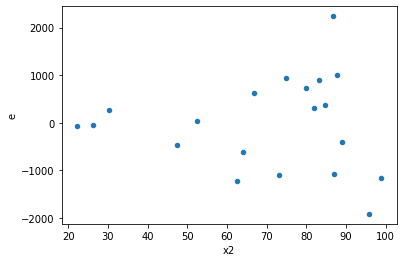

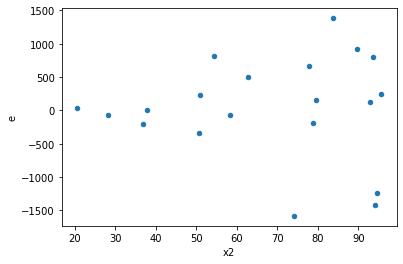

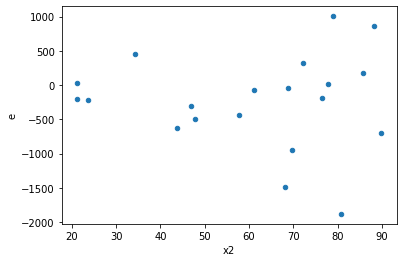

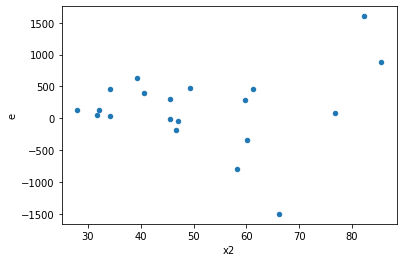

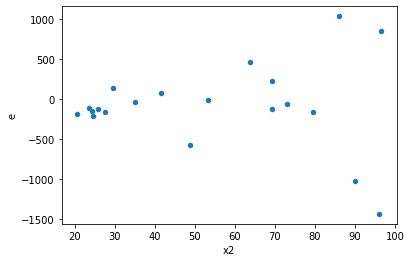

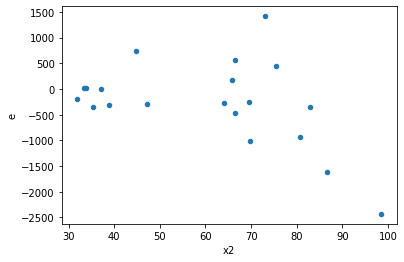

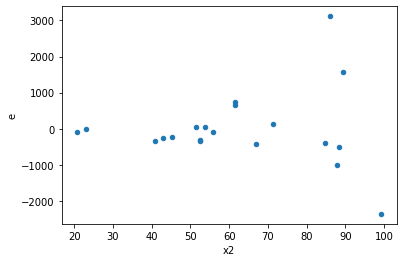

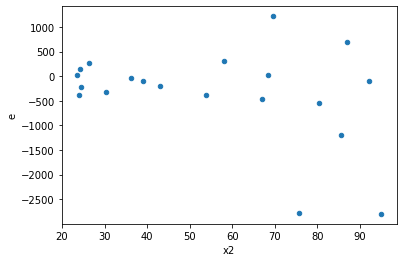

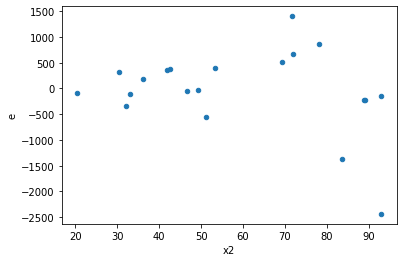

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,1552376.123488057,7641123.292260276,258729.35391467615,1273520.548710046,4.922211297022092,0.0735480864946958,0.9632259567526521,0.0367740432473479,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,3162708.9376117624,9832760.731246982,527118.156268627,1638793.4552078303,3.1089679528562426,0.19329428313270336,0.9033528584336483,0.09664714156635168,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,2210081.061179065,5663875.272329658,368346.8435298442,943979.2120549431,2.562745490117007,0.27696221870827387,0.8615188906458631,0.13848110935413693,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,171122.2202330117,4027559.9015122773,28520.370038835285,671259.9835853796,23.53615968766696,0.0012725489375384758,0.9993637255312308,0.0006362744687692379,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,66934.5825784163,5255819.643693627,11155.763763069384,875969.9406156045,78.52173631674243,3.9025114574098296e-05,0.999980487442713,1.9512557287049148e-05,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,937714.5595975359,5783533.033516789,156285.75993292264,963922.1722527981,6.1676903427830565,0.0435799349952668,0.9782100325023666,0.0217899674976334,Reject005=0 : Heteroscedasticity
10.0,6.0,6.0,1145909.5549501514,14093922.329885963,190984.92582502522,2348987.0549809937,12.299332237001085,0.007572258879268601,0.9962138705603657,0.0037861294396343004,Reject005=0 : Heteroscedasticity
13.0,6.0,6.0,2267285.729389929,2719119.611339134,377880.95489832154,453186.6018898557,1.1992840496864867,0.8310280594164992,0.5844859702917504,0.4155140297082496,Reject005=1 : Homoscedasticity
15.0,6.0,6.0,207867.47203654502,12056754.118744696,34644.5786727575,2009459.0197907826,58.00212029626746,9.49117928181753e-05,0.9999525441035909,4.745589640908765e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,1552376.123488057,7641123.292260276,258729.35391467615,1273520.548710046,4.922211297022092,0.0735480864946958,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,3162708.9376117624,9832760.731246982,527118.156268627,1638793.4552078303,3.1089679528562426,0.19329428313270336,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,3316885.1589813624,2299303.6033487427,552814.1931635604,383217.26722479047,0.6932117010812863,0.6676359594566156,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,2210081.061179065,5663875.272329658,368346.8435298442,943979.2120549431,2.562745490117007,0.27696221870827387,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,171122.2202330117,4027559.9015122773,28520.370038835285,671259.9835853796,23.53615968766696,0.0012725489375384758,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,66934.5825784163,5255819.643693627,11155.763763069384,875969.9406156045,78.52173631674243,3.9025114574098296e-05,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,1744997.6752076033,423083.17440404184,290832.94586793386,70513.86240067364,0.24245486421849097,0.1085136339882723,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,937714.5595975359,5783533.033516789,156285.75993292264,963922.1722527981,6.1676903427830565,0.0435799349952668,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,12941956.607760292,359432.4171951832,2156992.7679600487,59905.40286586387,0.027772648919225967,0.00037880781579441807,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      527
Reject005=0 : Heteroscedasticity    473
Name: Result_test, dtype: int64